In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# SINGLE (subset)


In [ ]:
import pandas as pd
df_single = pd.read_csv('/content/drive/MyDrive/Thesis/train_data/ILDC_single_train_dev.csv')
df_single

,text,label,split
0,CIVIL APPELLATE JURISDICTION Civil Appeal No. ...,1,train
1,CIVIL APPELLATE JURISDICTION Civil Appeal No. ...,1,train
2,CIVIL APPELLATE JURISDICTION Civil Appeal No. ...,0,train
3,CIVIL APPELLATE JURISDICTION Civil Appeal No. ...,1,train
4,"Ltd. v. Union of India Anr. 1961 1 S.C.R. 860,...",0,train
...,...,...,...
5971,civil appellate jurisdiction civil appeal numb...,1,dev
5972,criminal appellate jurisdiction special leave\...,0,dev
5973,civil appellate jurisdiction civil appeal numb...,0,dev
5974,civil appellate jurisdiction civil appeal numb...,1,dev


In [ ]:
print('Missing values:')
df_single.isna().sum()

Missing values:


text     0
label    0
split    0
dtype: int64

In [ ]:
df_single.duplicated().sum()

4

In [ ]:
df_single.loc[df_single['text'].duplicated(), :]

,text,label,split
1153,CIVIL APPELLATE JURISDICTION Civil Appeal No. ...,1,train
2579,CIVIL APPELLATE JURISDICTION Civil Appeal No 4...,0,train
3053,CIVIL APPELLATE JURISDICTION Civil Appeals Nos...,0,train
3092,"S. THAKUR, J. Leave granted. These appeals ar...",0,train


In [ ]:
df_single = df_single.drop_duplicates()

In [ ]:
df_single.duplicated().sum()

0

In [ ]:
df_single.reset_index(drop=True, inplace=True)

In [ ]:
print('Mean lenght documents:')
df_single['lenght_doc'] = df_single['text'].apply(lambda x: len(x.split()))
df_single['lenght_doc'].mean()

Mean lenght documents:


<ipython-input-9-aab9e8ad37a1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_single['lenght_doc'] = df_single['text'].apply(lambda x: len(x.split()))


3973.5870730073675

<Axes: xlabel='label', ylabel='lenght_doc'>

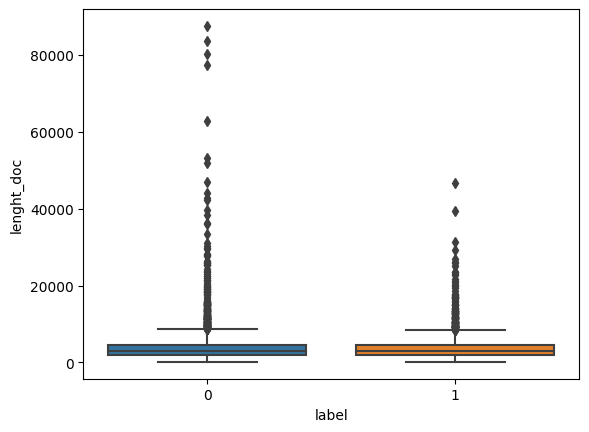

In [ ]:
# controllo se la il numero di token di un documento è legato alla label -> no
import seaborn as sns
sns.boxplot(x='label', y=df_single['lenght_doc'], data=df_single)

In [ ]:
del df_single["lenght_doc"]

In [ ]:
df_single['split'].value_counts()

train    4978
dev       994
Name: split, dtype: int64

In [ ]:
# divido train e dev
df_single_train = df_single[df_single["split"] == 'train']
df_single_dev = df_single[df_single["split"] == 'dev']

# resetto l'index di dev
df_single_dev.reset_index(drop=True, inplace=True)

In [ ]:
del df_single_train["split"]
del df_single_dev["split"]

In [ ]:
#df_multi_train.to_csv('/content/drive/MyDrive/Thesis/train_data/ILDC_multi_train.csv', index=False)
#df_multi_dev.to_csv('/content/drive/MyDrive/Thesis/train_data/ILDC_multi_dev.csv', index=False)

Class Distribution Train
0    3080
1    1898
Name: label, dtype: int64


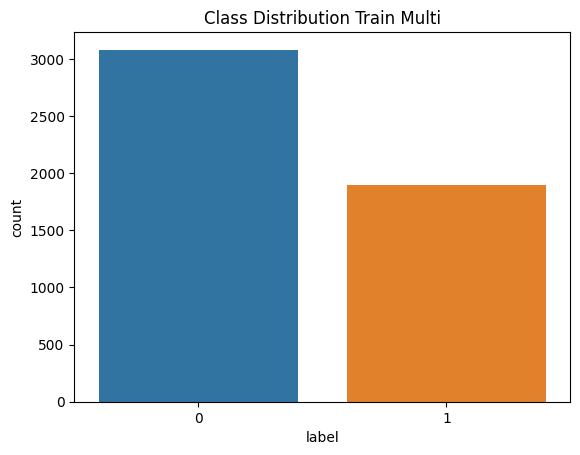

In [ ]:
print('Class Distribution Train')
print(df_single_train['label'].value_counts())
countplot = sns.countplot(x= df_single_train["label"]).set(title='Class Distribution Train Single dataset')
#fig = countplot.get_figure()

| **Class**              | **Value Counts**                                          | **Percentage (%)**    |
|--------------------------|-----------------------------------------------------------|--------------------|
| 0 (rejected)                    | 3082                                     |       61.88      |
| 1 (accepted)                  | 1899              |     38.12|

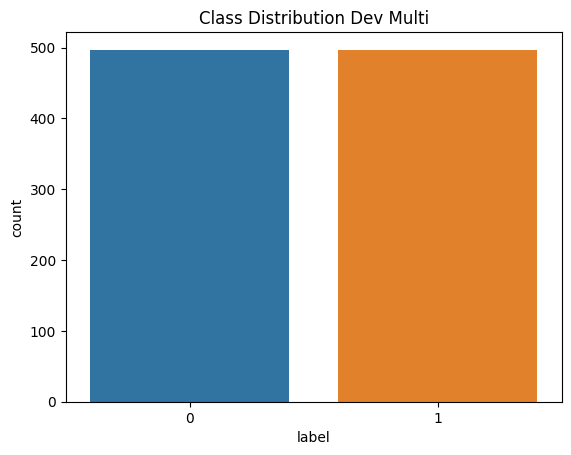

In [ ]:
countplot = sns.countplot(x= df_single_dev["label"]).set(title='Class Distribution Dev Single dataset')

# MULTI (subset)

In [ ]:
import pandas as pd
df_multi = pd.read_csv('/content/drive/MyDrive/Thesis/train_data/ILDC_multi_train_dev.csv')
df_multi

,text,label,split
0,"F. NARIMAN, J. Leave granted. In 2008, the Pu...",1,train
1,"S. THAKUR, J. Leave granted. These appeals ar...",0,train
2,"Markandey Katju, J. Leave granted. Heard lear...",1,train
3,"ALTAMAS KABIR,J. Leave granted. The question ...",1,train
4,"CIVIL APPEAL NO. 598 OF 2007 K. MATHUR, J. Th...",1,train
...,...,...,...
6071,civil appellate jurisdiction civil appeal numb...,1,dev
6072,criminal appellate jurisdiction special leave\...,0,dev
6073,civil appellate jurisdiction civil appeal numb...,0,dev
6074,civil appellate jurisdiction civil appeal numb...,1,dev


In [ ]:
print('Missing values:')
df_multi.isna().sum()

Missing values:


text     0
label    0
split    0
dtype: int64

In [ ]:
df_multi.duplicated().sum()

5

In [ ]:
df_multi.loc[df_multi['text'].duplicated(), :]

,text,label,split
18,"S. THAKUR, J. Leave granted. These appeals ar...",0,train
518,CIVIL APPELLATE JURISDICTION Civil Appeals Nos...,0,train
1573,CIVIL APPELLATE JURISDICTION Civil Appeal No 4...,0,train
3883,CIVIL APPELLATE JURISDICTION Civil Appeal No. ...,1,train
4094,CIVIL APPELLATE JURISDICTION Civil Appeal No. ...,1,train


In [ ]:
df_multi = df_multi.drop_duplicates()

In [ ]:
df_multi.duplicated().sum()

0

In [ ]:
df_multi.reset_index(drop=True, inplace=True)

In [ ]:
print('Mean lenght documents:')
df_multi['lenght_doc'] = df_multi['text'].apply(lambda x: len(x.split()))
df_multi['lenght_doc'].mean()

Mean lenght documents:


<ipython-input-25-7473f06b6428>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_multi['lenght_doc'] = df_multi['text'].apply(lambda x: len(x.split()))


3969.9616208202933

<Axes: xlabel='label', ylabel='lenght_doc'>

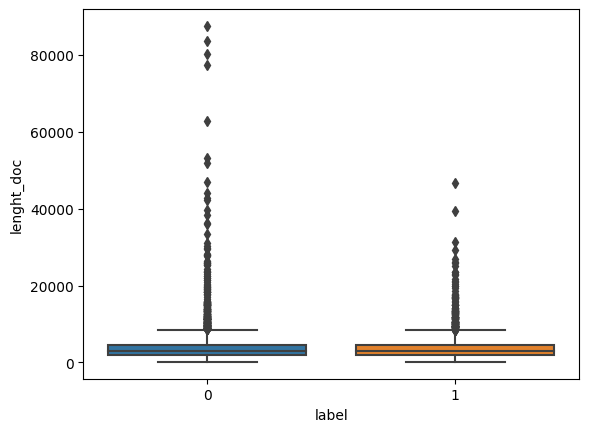

In [ ]:
# controllo se la il numero di token di un documento è legato alla label -> no
import seaborn as sns
sns.boxplot(x='label', y=df_multi['lenght_doc'], data=df_multi)

In [ ]:
del df_multi["lenght_doc"]

In [ ]:
df_multi['split'].value_counts()

train    5077
dev       994
Name: split, dtype: int64

In [ ]:
# divido train e dev
df_multi_train = df_multi[df_multi["split"] == 'train']
df_multi_dev = df_multi[df_multi["split"] == 'dev']

# resetto l'index di dev
df_multi_dev.reset_index(drop=True, inplace=True)

In [ ]:
del df_multi_train["split"]
del df_multi_dev["split"]

In [ ]:
#df_multi_train.to_csv('/content/drive/MyDrive/Thesis/train_data/ILDC_multi_train.csv', index=False)
#df_multi_dev.to_csv('/content/drive/MyDrive/Thesis/train_data/ILDC_multi_dev.csv', index=False)

Class Distribution Train
0    3144
1    1933
Name: label, dtype: int64


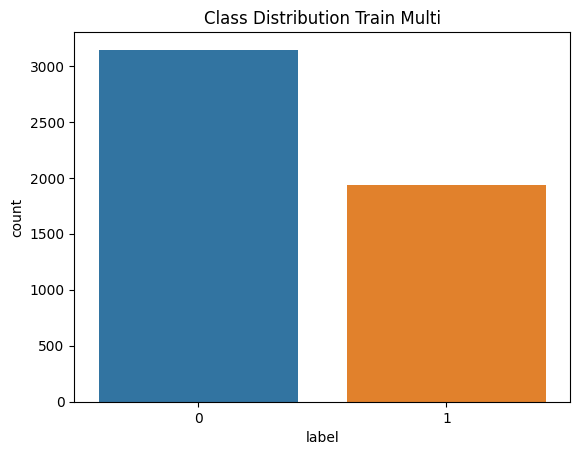

In [ ]:
print('Class Distribution Train')
print(df_multi_train['label'].value_counts())
countplot = sns.countplot(x= df_multi_train["label"]).set(title='Class Distribution Train Multi dataset')
#fig = countplot.get_figure()

| **Class**              | **Value Counts**                                          | **Percentage (%)**    |
|--------------------------|-----------------------------------------------------------|--------------------|
| 0 (rejected)                    | 3144                                    |       61.92      |
| 1 (accepted)                  | 1933             |     38.08|

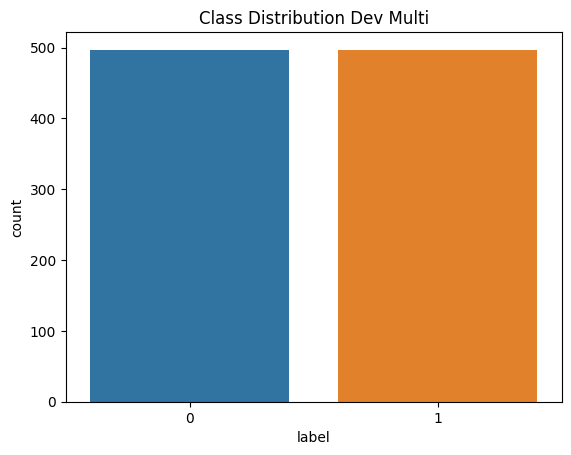

In [ ]:
countplot = sns.countplot(x= df_multi_dev["label"]).set(title='Class Distribution Dev Multi dataset')

# SINGLE (whole dataset)


In [ ]:
import pandas as pd
df_single = pd.read_csv('/content/drive/MyDrive/Thesis/train_data/ILDC_single.csv')
df_single

,text,label,split,name
0,"F. NARIMAN, J. Leave granted. In 2008, the Pu...",1,train,2019_890.txt
1,"S. THAKUR, J. Leave granted. These appeals ar...",0,train,2014_170.txt
2,"Markandey Katju, J. Leave granted. Heard lear...",1,train,2010_721.txt
3,"ALTAMAS KABIR,J. Leave granted. The question ...",1,train,2008_1460.txt
4,"CIVIL APPEAL NO. 598 OF 2007 K. MATHUR, J. Th...",1,train,2008_188.txt
...,...,...,...,...
7588,civil appellate jurisdiction civil appeal numb...,1,dev,1985_121.txt
7589,criminal appellate jurisdiction special leave\...,0,dev,1984_228.txt
7590,civil appellate jurisdiction civil appeal numb...,0,dev,1965_317.txt
7591,civil appellate jurisdiction civil appeal numb...,1,dev,1976_191.txt


In [ ]:
print('Missing values:')
df_single.isna().sum()

Missing values:


text     0
label    0
split    0
name     0
dtype: int64

In [ ]:
df_single.duplicated().sum()

0

In [ ]:
print('Mean lenght documents:')
df_single['lenght_doc'] = df_single['text'].apply(lambda x: len(x.split()))
df_single['lenght_doc'].mean()

Mean lenght documents:


3945.4750428025814

<Axes: xlabel='label', ylabel='lenght_doc'>

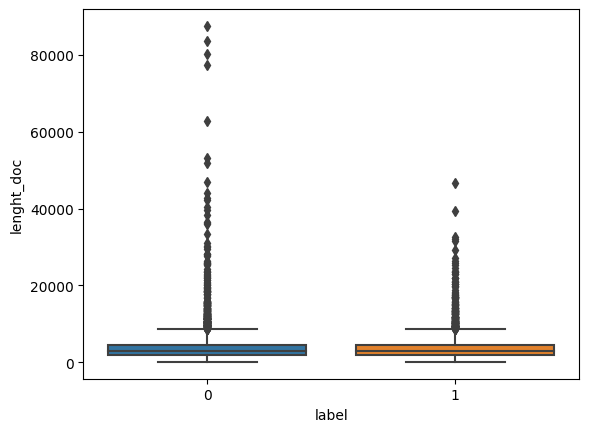

In [ ]:
# controllo se la il numero di token di un documento è legato alla label -> no
import seaborn as sns
sns.boxplot(x='label', y=df_single['lenght_doc'], data=df_single)

In [ ]:
del df_single["lenght_doc"]

In [ ]:
df_single['split'].value_counts()

train    5082
test     1517
dev       994
Name: split, dtype: int64

In [ ]:
# divido train e dev
df_single_train = df_single[df_single["split"] == 'train']
df_single_dev = df_single[df_single["split"] == 'dev']
df_single_test = df_single[df_single["split"] == 'test']

# resetto l'index di dev
df_single_dev.reset_index(drop=True, inplace=True)
df_single_test.reset_index(drop=True, inplace=True)

In [ ]:
del df_single_train["split"]
del df_single_dev["split"]
del df_single_test["split"]

In [ ]:
#df_multi_train.to_csv('/content/drive/MyDrive/Thesis/train_data/ILDC_multi_train.csv', index=False)
#df_multi_dev.to_csv('/content/drive/MyDrive/Thesis/train_data/ILDC_multi_dev.csv', index=False)

Class Distribution Train
0    3147
1    1935
Name: label, dtype: int64


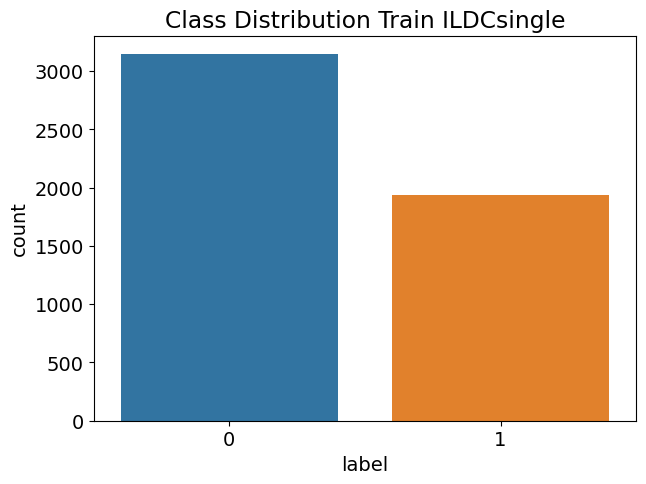

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(7, 5))
# Set a larger font size for better visibility
plt.rcParams.update({'font.size': 14})

print('Class Distribution Train')
print(df_single_train['label'].value_counts())

# Create a countplot with a larger font size
countplot = sns.countplot(x=df_single_train["label"]).set(title='Class Distribution Train ILDCsingle')

plt.savefig("/content/drive/MyDrive/Thesis/train_data/countplotsingle.png")
plt.savefig("/content/drive/MyDrive/Thesis/train_data/countplotsingle.eps", format="eps")
plt.show()

| **Class**              | **Value Counts**                                          | **Percentage (%)**    |
|--------------------------|-----------------------------------------------------------|--------------------|
| 0 (rejected)                    | 3147                                    |       61.92      |
| 1 (accepted)                  | 1935             |     38.08|

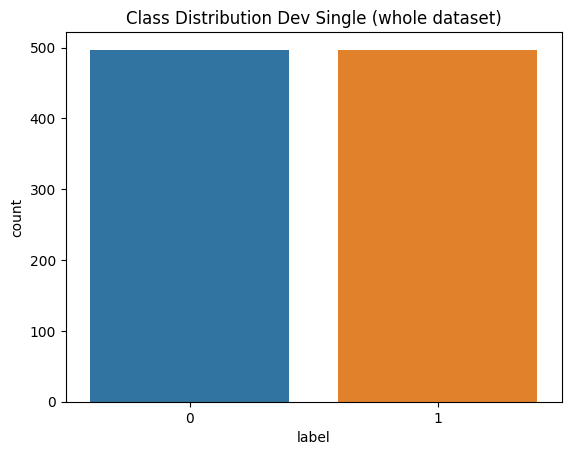

In [ ]:
countplot = sns.countplot(x= df_single_dev["label"]).set(title='Class Distribution Dev Single (whole dataset)')

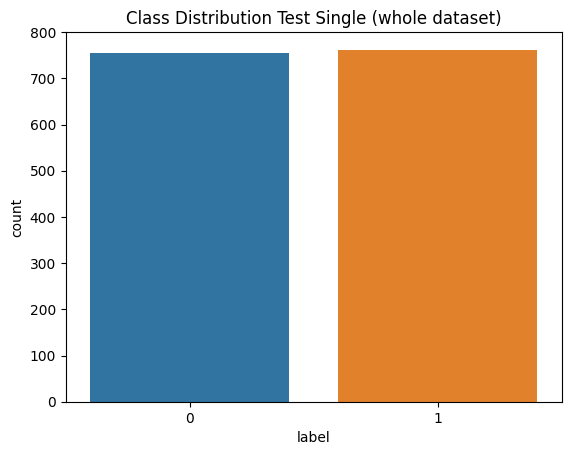

In [ ]:
countplot = sns.countplot(x= df_single_test["label"]).set(title='Class Distribution Test Single (whole dataset)')

# MULTI

In [ ]:
import pandas as pd
df_multi = pd.read_csv('/content/drive/MyDrive/Thesis/train_data/ILDC_multi.csv')
df_multi

,text,label,split,name
0,"Uday Umesh Lalit, J. These appeals arise out ...",0,train,2020_1.txt
1,"Indira Banerjee, J. These appeals are against...",0,train,2020_2.txt
2,TABLE OF CONTENTS Introduction A Contentions B...,0,train,2020_3.txt
3,"Dinesh Maheshwari, J. Introductory with brief...",0,train,2020_4.txt
4,"Dinesh Maheshwari, J. Preliminary By way of t...",0,train,2020_5.txt
...,...,...,...,...
34811,"Dr. B. S. CHAUHAN, J. This appeal has been pr...",1,test,2013_101.txt
34812,"Rajendra Babu, J. The respondents, who are co...",0,test,2000_1559.txt
34813,Leave granted. Respondent 1 Insurance Company...,1,test,1998_83.txt
34814,Leave granted. The respondent is an Executive...,1,test,1995_2.txt


In [ ]:
print('Missing values:')
df_multi.isna().sum()

Missing values:


text     0
label    0
split    0
name     0
dtype: int64

In [ ]:
df_multi.duplicated().sum()

0

In [ ]:
print('Mean lenght documents:')
df_multi['lenght_doc'] = df_multi['text'].apply(lambda x: len(x.split()))
df_multi['lenght_doc'].mean()

Mean lenght documents:


3208.0280618106617

<Axes: xlabel='label', ylabel='lenght_doc'>

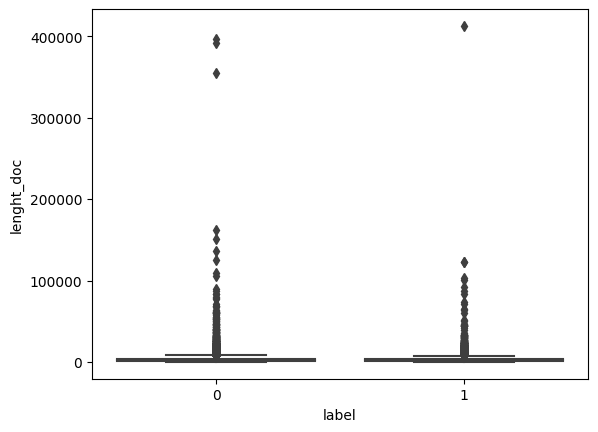

In [ ]:
# controllo se la il numero di token di un documento è legato alla label -> no
import seaborn as sns
sns.boxplot(x='label', y=df_multi['lenght_doc'], data=df_multi)

In [ ]:
del df_multi["lenght_doc"]

In [ ]:
df_multi['split'].value_counts()

train    32305
test      1517
dev        994
Name: split, dtype: int64

In [ ]:
# divido train e dev
df_multi_train = df_multi[df_multi["split"] == 'train']
df_multi_dev = df_multi[df_multi["split"] == 'dev']
df_multi_test = df_multi[df_multi["split"] == 'test']

# resetto l'index di dev
df_multi_dev.reset_index(drop=True, inplace=True)
df_multi_test.reset_index(drop=True, inplace=True)

In [ ]:
del df_multi_train["split"]
del df_multi_dev["split"]
del df_multi_test["split"]

In [ ]:
#df_multi_train.to_csv('/content/drive/MyDrive/Thesis/train_data/ILDC_multi_train.csv', index=False)
#df_multi_dev.to_csv('/content/drive/MyDrive/Thesis/train_data/ILDC_multi_dev.csv', index=False)

Class Distribution Train
0    18920
1    13385
Name: label, dtype: int64


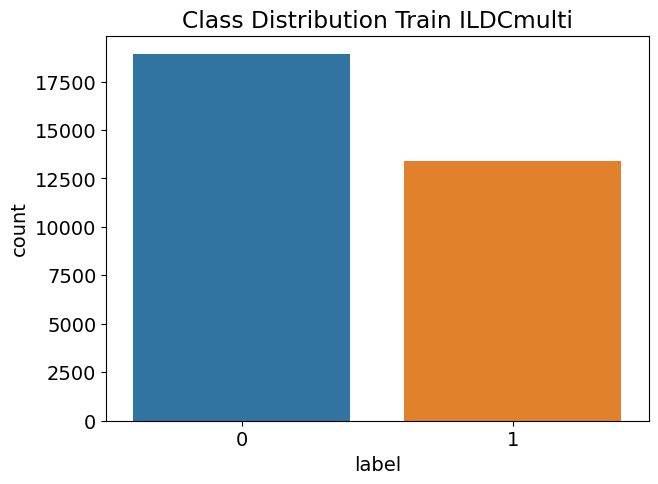

In [ ]:
# Set a larger font size for better visibility
plt.figure(figsize=(7, 5))
plt.rcParams.update({'font.size': 14})
print('Class Distribution Train')
print(df_multi_train['label'].value_counts())
countplot = sns.countplot(x= df_multi_train["label"]).set(title='Class Distribution Train ILDCmulti')
#fig = countplot.get_figure()

plt.savefig("/content/drive/MyDrive/Thesis/train_data/countplotmulti.png")
plt.savefig("/content/drive/MyDrive/Thesis/train_data/countplotmulti.eps", format="eps")

| **Class**              | **Value Counts**                                          | **Percentage (%)**    |
|--------------------------|-----------------------------------------------------------|--------------------|
| 0 (rejected)                    | 18920                                    |       58.57      |
| 1 (accepted)                  | 13385             |     41.43|

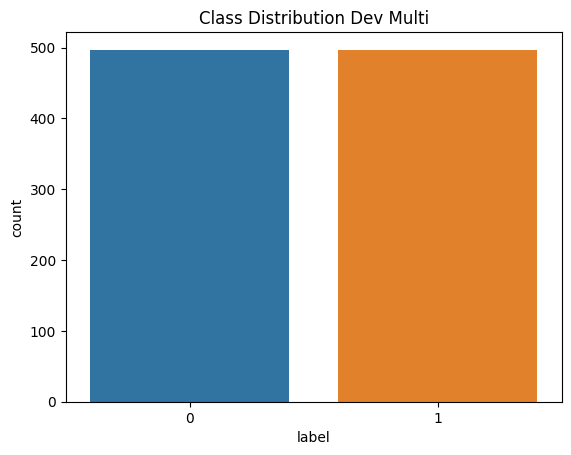

In [ ]:
countplot = sns.countplot(x= df_multi_dev["label"]).set(title='Class Distribution Dev Multi')

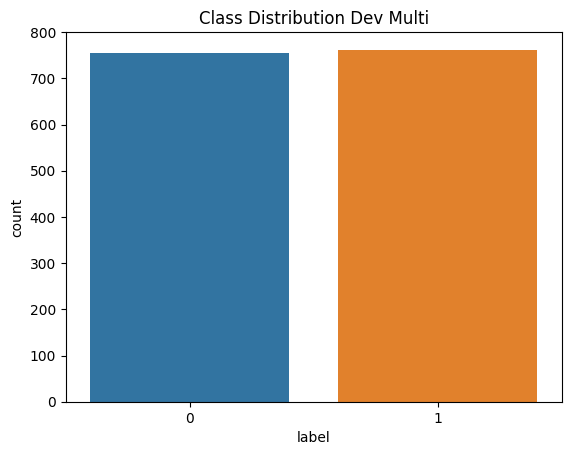

In [ ]:
countplot = sns.countplot(x= df_multi_test["label"]).set(title='Class Distribution Dev Multi')